In [34]:
import zipfile
import os
import pandas as pd
import numpy as np
print(pd.__version__)
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

2.2.3


In [35]:
file_path = r"archive.zip"
extracted_file_path = r"D:\ML\Malll_customer"

# Ensure the destination folder exists
os.makedirs(extracted_file_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_file_path)
    print(f"Files extracted to: {extracted_file_path}")

# List extracted files
extracted_files = os.listdir(extracted_file_path)
print("Extracted files:")
print(extracted_files)

Files extracted to: D:\ML\Malll_customer
Extracted files:
['archive.zip', 'Mall_Customers.csv', 'PCA_Analysis_Report.docx', 'UL_project_phase_2.ipynb']


In [36]:
Mall_Customers = pd.read_csv("Mall_Customers.csv")
Mall_Customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [37]:
for col in Mall_Customers:
    print(Mall_Customers[col].isnull().value_counts())

CustomerID
False    200
Name: count, dtype: int64
Genre
False    200
Name: count, dtype: int64
Age
False    200
Name: count, dtype: int64
Annual Income (k$)
False    200
Name: count, dtype: int64
Spending Score (1-100)
False    200
Name: count, dtype: int64


In [38]:
Mall_Customers=Mall_Customers.drop(columns="CustomerID",axis=1)
Mall_Customers

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [39]:
Mall_Customers["Genre"].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

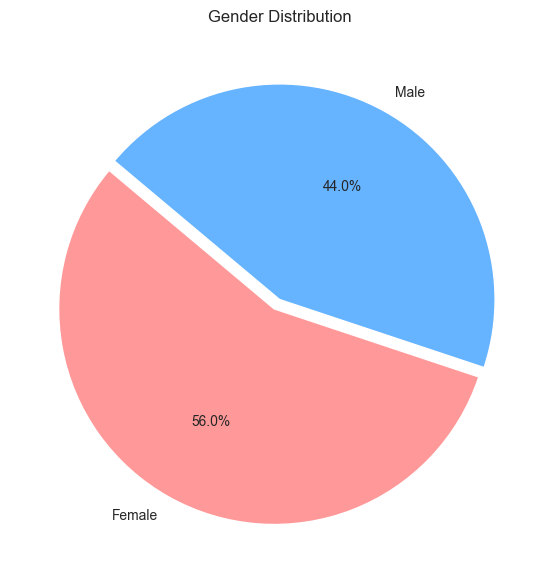

In [40]:
# Data
genders = ['Female', 'Male']
counts = [112, 88]

# Colors for better visualization
colors = ['#ff9999', '#66b3ff']

# Plot the pie chart
plt.figure(figsize=(7, 7))  # Set figure size
plt.pie(counts, labels=genders, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0))
plt.title("Gender Distribution")
plt.show()

In [41]:
print(Mall_Customers["Age"].min())
print(Mall_Customers["Age"].max())

18
70


In [42]:
# Define age categories
def age_category(age):
    if 18 <= age < 30:
        return 1
    elif 30 <= age < 50:
        return 2
    elif 50 <= age < 71:
        return 3
    else:
        return None  # or some default value if age is outside the range

# Apply the function to the Age column
Mall_Customers["age_gategory"] = Mall_Customers["Age"].apply(age_category)


In [43]:
Mall_Customers

,Genre,Age,Annual Income (k$),Spending Score (1-100),age_gategory
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,2
197,Male,32,126,74,2
198,Male,32,137,18,2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10968\533579061.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Mall_Customers, x="age_gategory", palette="viridis")


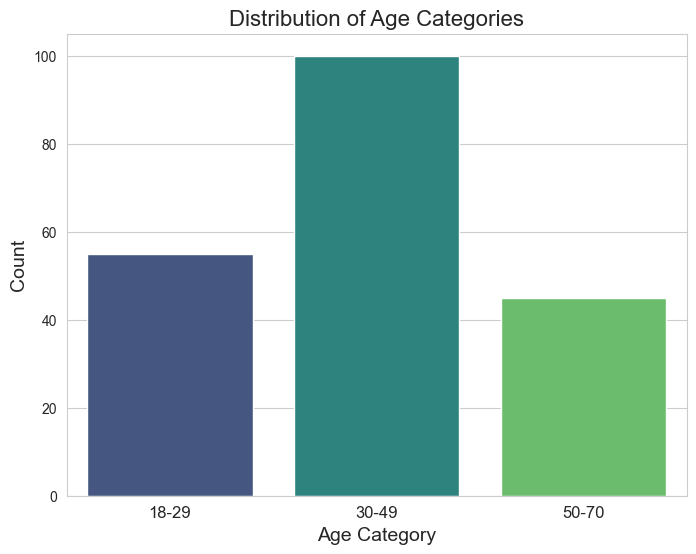

In [44]:
# Set the style for the plot
sns.set_style("whitegrid")

# Plot the distribution of age categories
plt.figure(figsize=(8, 6))
sns.countplot(data=Mall_Customers, x="age_gategory", palette="viridis")

# Add labels and title
plt.xlabel("Age Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Age Categories", fontsize=16)
plt.xticks(ticks=[0, 1, 2], labels=["18-29", "30-49", "50-70"], fontsize=12)

# Show the plot
plt.show()

In [45]:
print(Mall_Customers["Annual Income (k$)"].max())
print(Mall_Customers["Annual Income (k$)"].min())

137
15


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10968\1342857135.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Mall_Customers, y="Annual Income (k$)", palette="cool")


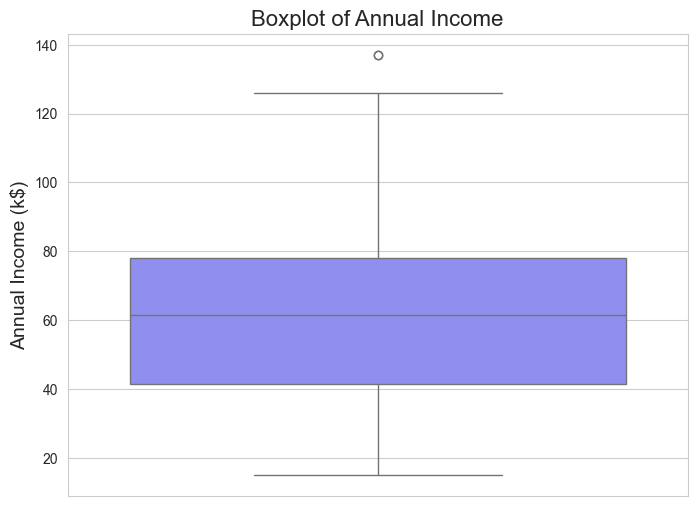

In [46]:
# Set the style for the plot
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=Mall_Customers, y="Annual Income (k$)", palette="cool")

# Add labels and title
plt.ylabel("Annual Income (k$)", fontsize=14)
plt.title("Boxplot of Annual Income", fontsize=16)

# Show the plot
plt.show()

In [47]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = Mall_Customers["Annual Income (k$)"].quantile(0.25)
Q3 = Mall_Customers["Annual Income (k$)"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
Mall_Customers_no_outliers = Mall_Customers[
    (Mall_Customers["Annual Income (k$)"] >= lower_bound) &
    (Mall_Customers["Annual Income (k$)"] <= upper_bound)
]

# Display the filtered dataset
Mall_Customers_no_outliers


,Genre,Age,Annual Income (k$),Spending Score (1-100),age_gategory
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,2
...,...,...,...,...,...
193,Female,38,113,91,2
194,Female,47,120,16,2
195,Female,35,120,79,2
196,Female,45,126,28,2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10968\3706961929.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Mall_Customers, y="Spending Score (1-100)", palette="cool")
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


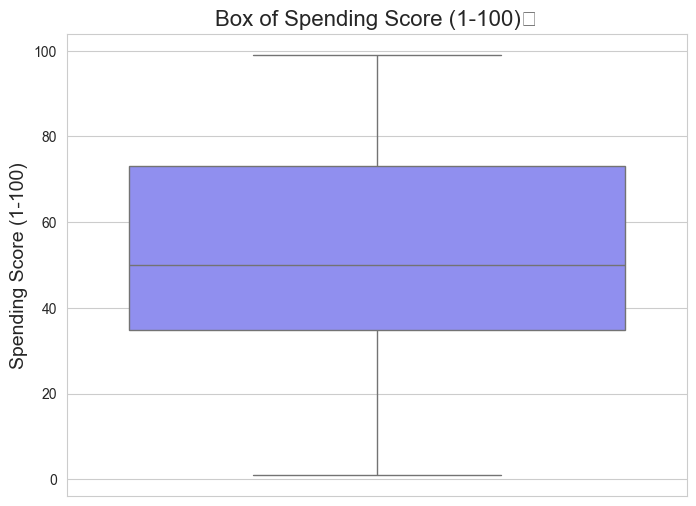

In [48]:
# Set the style for the plot
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=Mall_Customers, y="Spending Score (1-100)", palette="cool")

# Add labels and title
plt.ylabel("Spending Score (1-100)", fontsize=14)
plt.title("Box of Spending Score (1-100)	", fontsize=16)

# Show the plot
plt.show()

In [49]:
print(Mall_Customers_no_outliers["Spending Score (1-100)"].max())
print(Mall_Customers_no_outliers["Spending Score (1-100)"].min())

99
1


(198, 2)


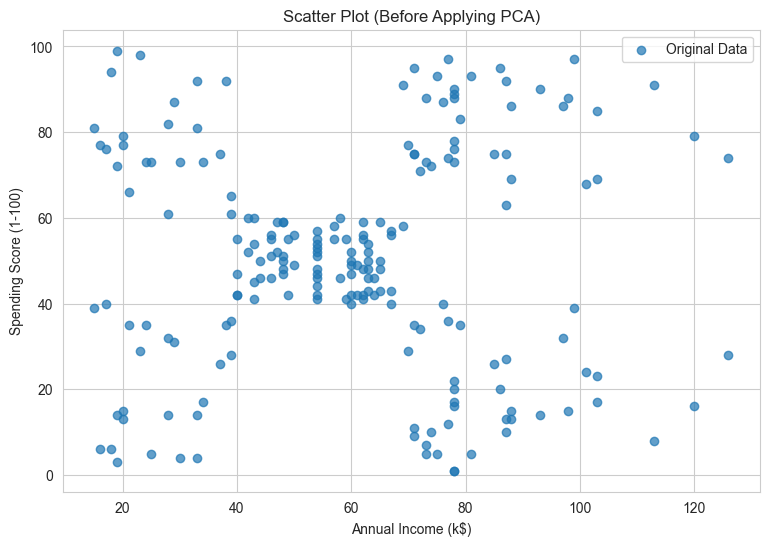

In [50]:
# For this example, we will use Annual Income and Spending Score
features = Mall_Customers_no_outliers[['Annual Income (k$)', 'Spending Score (1-100)']].values


print(features.shape)
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(features[:, 0], features[:, 1], alpha=0.7, label='Original Data')
ax.set_title("Scatter Plot (Before Applying PCA)")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
ax.legend()
plt.show()


In [51]:
# Step 1: Standardize the data
mean = np.mean(features, axis=0)
std = np.std(features, axis=0)
standardized_data = (features - mean) / std

# Step 2: Compute the covariance matrix
features = np.array(features)
cov_matrix = np.cov(standardized_data.T) # Use np.cov for covariance calculation
print(cov_matrix)

[[1.00507614 0.0101309 ]
 [0.0101309  1.00507614]]


In [52]:
# Step 1: Power Iteration to compute the dominant eigenvalue and eigenvector
def power_iteration(A, num_simulations=1000, epsilon=1e-10):

    n, _ = A.shape
    b_k = np.random.rand(n)  # Random initial vector

    for _ in range(num_simulations):
        # Matrix-vector multiplication
        b_k1 = np.dot(A, b_k)

        # Normalize the vector
        b_k1_norm = np.linalg.norm(b_k1)
        b_k1 = b_k1 / b_k1_norm

        # Convergence check
        if np.linalg.norm(b_k - b_k1) < epsilon:
            break

        b_k = b_k1

    # Compute the eigenvalue
    eigenvalue = np.dot(b_k.T, np.dot(A, b_k)) / np.dot(b_k.T, b_k)
    eigenvector = b_k
    return eigenvalue, eigenvector

# Step 2: Deflation to compute all eigenvalues and eigenvectors
def eig_from_scratch(A, num_eigenvalues=None):

    n, _ = A.shape
    if num_eigenvalues is None:
        num_eigenvalues = n

    eigenvalues = []
    eigenvectors = []

    A_copy = A.copy()

    for _ in range(num_eigenvalues):
        # Compute the dominant eigenvalue and eigenvector
        eigenvalue, eigenvector = power_iteration(A_copy)

        # Store results
        eigenvalues.append(eigenvalue)
        eigenvectors.append(eigenvector)

        # Deflate the matrix
        eigenvector = eigenvector.reshape(-1, 1)
        A_copy = A_copy - eigenvalue * np.dot(eigenvector, eigenvector.T)

    return eigenvalues, np.array(eigenvectors).T


In [53]:
# Compute eigenvalues and eigenvectors from scratch
eigenvalues, eigenvectors = eig_from_scratch(cov_matrix)

# Display results
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues: [1.0152070421801636, 0.9949452420837952]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [54]:



# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = np.array(eigenvalues)[sorted_indices]
eigenvectors = np.array(eigenvectors)[:, sorted_indices]

# Explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Choose k to cover at least 95% of variance
k = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Selected number of components: {k}")

print("Shape of standardized_data:", standardized_data.shape)


Selected number of components: 2
Shape of standardized_data: (198, 2)


In [55]:
k = 2  # For 2D visualization
top_eigenvectors = eigenvectors[:, :k]  # Select eigenvectors for top k components
reduced_data = np.dot(standardized_data, top_eigenvectors)  # Project the data


print(f"Shape of top egienvector : {top_eigenvectors.shape}")

Shape of top egienvector : (2, 2)


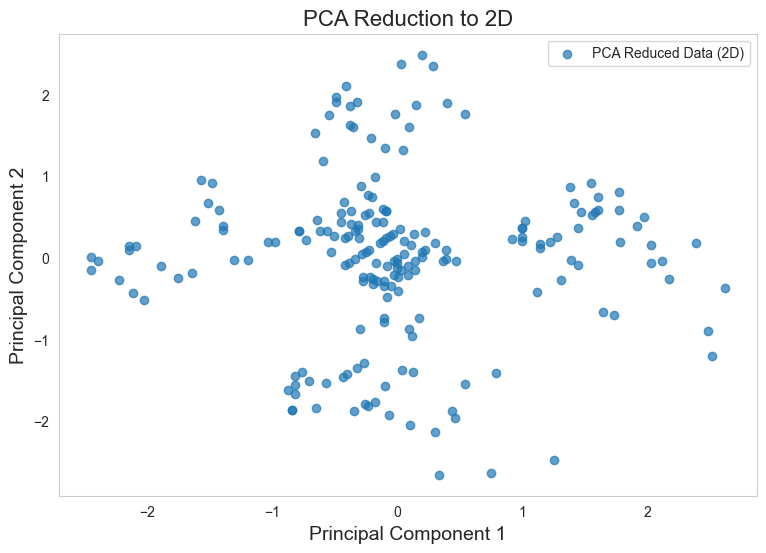

In [56]:
k = 2  # For 2D visualization
top_eigenvectors = eigenvectors[:, :k]  # Select eigenvectors for top k components
reduced_data = np.dot(standardized_data, top_eigenvectors)  # Project the data

# Visualize 2D PCA
plt.figure(figsize=(9, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7, label='PCA Reduced Data (2D)')
plt.title("PCA Reduction to 2D", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [57]:
# Function to evaluate reconstruction error
def reconstruction_error(original_data, reduced_data, components):
    reconstructed = np.dot(reduced_data, components.T)
    mse = np.mean((original_data - reconstructed)**2)
    return mse

In [58]:
# Evaluate for different thresholds
thresholds = np.arange(0.5, 1.01, 0.05) 
errors = []
variance_ratios = []
num_components = []

In [59]:
for threshold in thresholds:
    # Find the number of components to meet the threshold
    k = np.argmax(cumulative_variance >= threshold) + 1
    num_components.append(k)
    
    # Get the top components
    top_eigenvectors = eigenvectors[:, :k]
    
    # Project data onto the reduced components
    reduced_data = np.dot(standardized_data, top_eigenvectors)
    
    # Calculate reconstruction error
    reconstructed = np.dot(reduced_data, top_eigenvectors.T)
    mse = np.mean((standardized_data - reconstructed) ** 2)
    errors.append(mse)
    
    # Store explained variance ratio
    variance_ratios.append(cumulative_variance[k - 1])

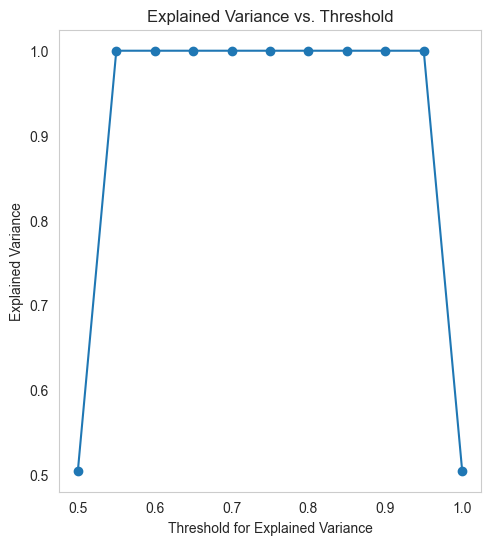

In [60]:
# Plot explained variance and reconstruction error
plt.figure(figsize=(12, 6))

# Explained variance
plt.subplot(1, 2, 1)
plt.plot(thresholds, variance_ratios, marker='o', label='Explained Variance')
plt.xlabel("Threshold for Explained Variance")
plt.ylabel("Explained Variance")
plt.title("Explained Variance vs. Threshold")
plt.grid()

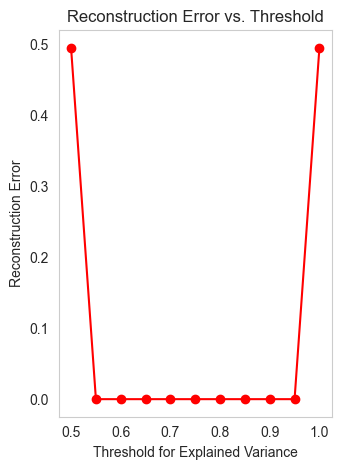

In [61]:
# Reconstruction error
plt.subplot(1, 2, 2)
plt.plot(thresholds, errors, marker='o', label='Reconstruction Error', color='r')
plt.xlabel("Threshold for Explained Variance")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error vs. Threshold")
plt.grid()

plt.tight_layout()
plt.show()

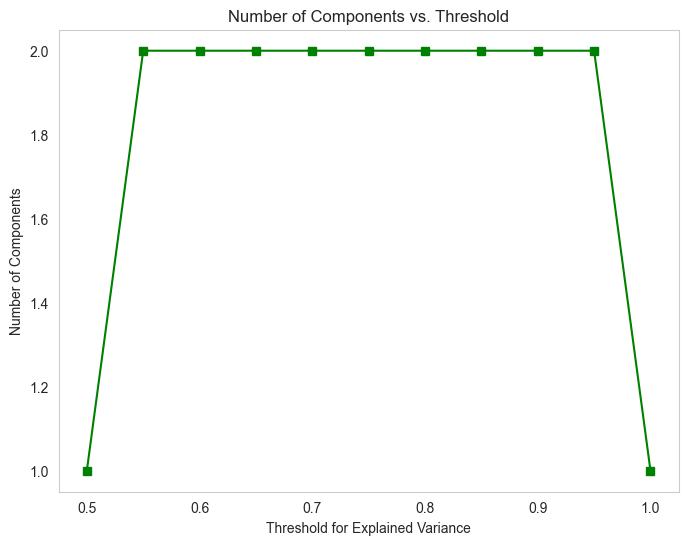

In [62]:

# Plot number of components vs. threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, num_components, marker='s', label='Number of Components', color='g')
plt.xlabel("Threshold for Explained Variance")
plt.ylabel("Number of Components")
plt.title("Number of Components vs. Threshold")
plt.grid()
plt.show()

Selected Threshold: 0.9
Optimal Number of Components: 2
Explained Variance Retained: 1.00


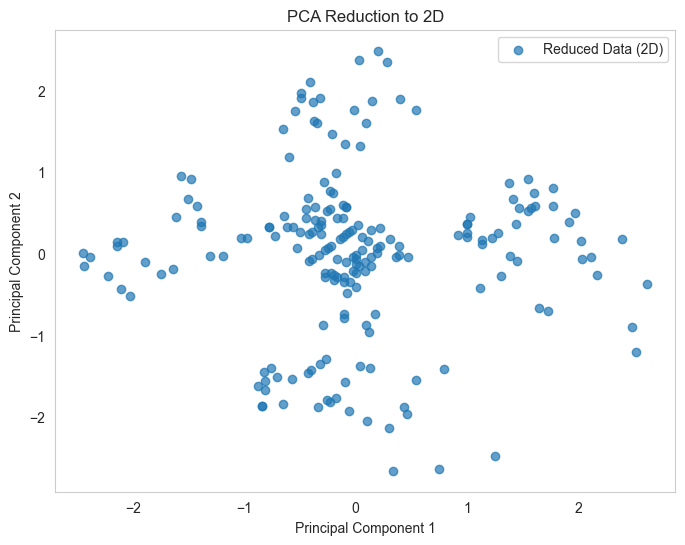

In [63]:
# Optimal threshold and number of components
desired_threshold = 0.90  # Based on the analysis of your graphs
optimal_components = 2    # Based on the Number of Components vs. Threshold graph

# Select the top eigenvectors for the optimal components
optimal_eigenvectors = eigenvectors[:, :optimal_components]

# Project the data onto the selected components
optimal_reduced_data = np.dot(standardized_data, optimal_eigenvectors)

# Display results
print(f"Selected Threshold: {desired_threshold}")
print(f"Optimal Number of Components: {optimal_components}")
print(f"Explained Variance Retained: {cumulative_variance[optimal_components - 1]:.2f}")

# Visualization of reduced data if reduced to 2D
plt.figure(figsize=(8, 6))
plt.scatter(optimal_reduced_data[:, 0], optimal_reduced_data[:, 1], alpha=0.7, label='Reduced Data (2D)')
plt.title("PCA Reduction to 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

In [64]:
# Features for original and PCA-reduced datasets
original_features = standardized_data
pca_reduced_features = optimal_reduced_data


In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set number of clusters
n_clusters = 4

# K-Means on original data
kmeans_original = KMeans(n_clusters=n_clusters, random_state=42)
original_labels = kmeans_original.fit_predict(original_features)

# K-Means on PCA-reduced data
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
pca_labels = kmeans_pca.fit_predict(pca_reduced_features)

# Evaluate clustering performance using silhouette score
silhouette_original = silhouette_score(original_features, original_labels)
silhouette_pca = silhouette_score(pca_reduced_features, pca_labels)

print(f"Silhouette Score (Original Data): {silhouette_original:.2f}")
print(f"Silhouette Score (PCA-Reduced Data): {silhouette_pca:.2f}")


Silhouette Score (Original Data): 0.50
Silhouette Score (PCA-Reduced Data): 0.50


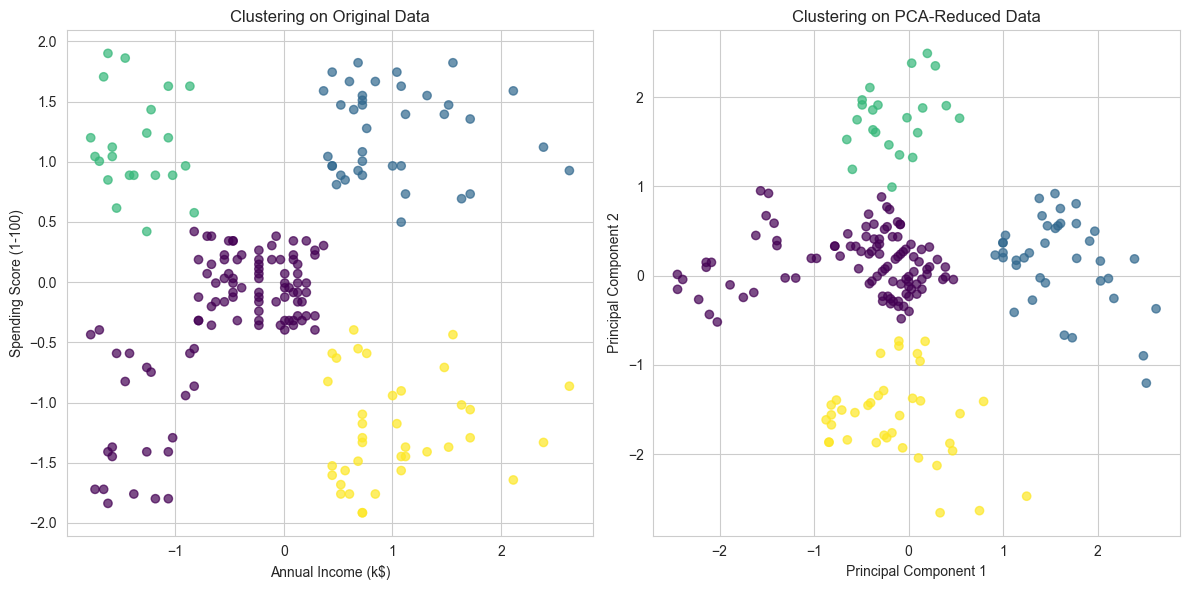

In [66]:
# Visualization of original data clustering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(original_features[:, 0], original_features[:, 1], c=original_labels, cmap='viridis', alpha=0.7)
plt.title("Clustering on Original Data")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

# Visualization of PCA-reduced data clustering
plt.subplot(1, 2, 2)
plt.scatter(pca_reduced_features[:, 0], pca_reduced_features[:, 1], c=pca_labels, cmap='viridis', alpha=0.7)
plt.title("Clustering on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()
